# Учимся работе с данными - от загрузки до моделирования

In [117]:
import pandas as pd
import kagglehub
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                           f1_score, roc_curve, auc, confusion_matrix, 
                           classification_report)

In [118]:
path = kagglehub.dataset_download("uciml/breast-cancer-wisconsin-data")
print("Path to dataset files:", path)

Path to dataset files: /Users/anchar/.cache/kagglehub/datasets/uciml/breast-cancer-wisconsin-data/versions/2


In [119]:
df = pd.read_csv(f"{path}/data.csv")

# EDA
### Содержимое таблицы

In [120]:
print("Размер датасета:", df.shape)
print("\n\nПервые 5 строк:")
df.head()

Размер датасета: (569, 33)


Первые 5 строк:


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [121]:
print("Информация о столбцах:")
df.info()

Информация о столбцах:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  per

In [122]:
print("\nСтатистика:")
df.describe()


Статистика:


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [123]:
print("\nСтатистики по целевой переменной (diagnosis):")
df['diagnosis'] = df['diagnosis'].map({'M': 'Malignant', 'B': 'Benign'})
print(f"Уникальные значения в target: {df['diagnosis'].unique()}")



Статистики по целевой переменной (diagnosis):
Уникальные значения в target: ['Malignant' 'Benign']


In [124]:
print("\nРаспределение целевой переменной:")
print(df['diagnosis'].value_counts())
print(f"\nДоля злокачественных: {df['diagnosis'].value_counts(normalize=True)['Malignant']:.2%}")


Распределение целевой переменной:
diagnosis
Benign       357
Malignant    212
Name: count, dtype: int64

Доля злокачественных: 37.26%


In [125]:
df = df.drop('id', axis=1, errors='ignore')

print("\nСредние значения по группам:")
grouped_stats = df.groupby('diagnosis').mean()
print(grouped_stats.T.head(31))


Средние значения по группам:
diagnosis                    Benign    Malignant
radius_mean               12.146524    17.462830
texture_mean              17.914762    21.604906
perimeter_mean            78.075406   115.365377
area_mean                462.790196   978.376415
smoothness_mean            0.092478     0.102898
compactness_mean           0.080085     0.145188
concavity_mean             0.046058     0.160775
concave points_mean        0.025717     0.087990
symmetry_mean              0.174186     0.192909
fractal_dimension_mean     0.062867     0.062680
radius_se                  0.284082     0.609083
texture_se                 1.220380     1.210915
perimeter_se               2.000321     4.323929
area_se                   21.135148    72.672406
smoothness_se              0.007196     0.006780
compactness_se             0.021438     0.032281
concavity_se               0.025997     0.041824
concave points_se          0.009858     0.015060
symmetry_se                0.020584    

### Анализ корреляции данных

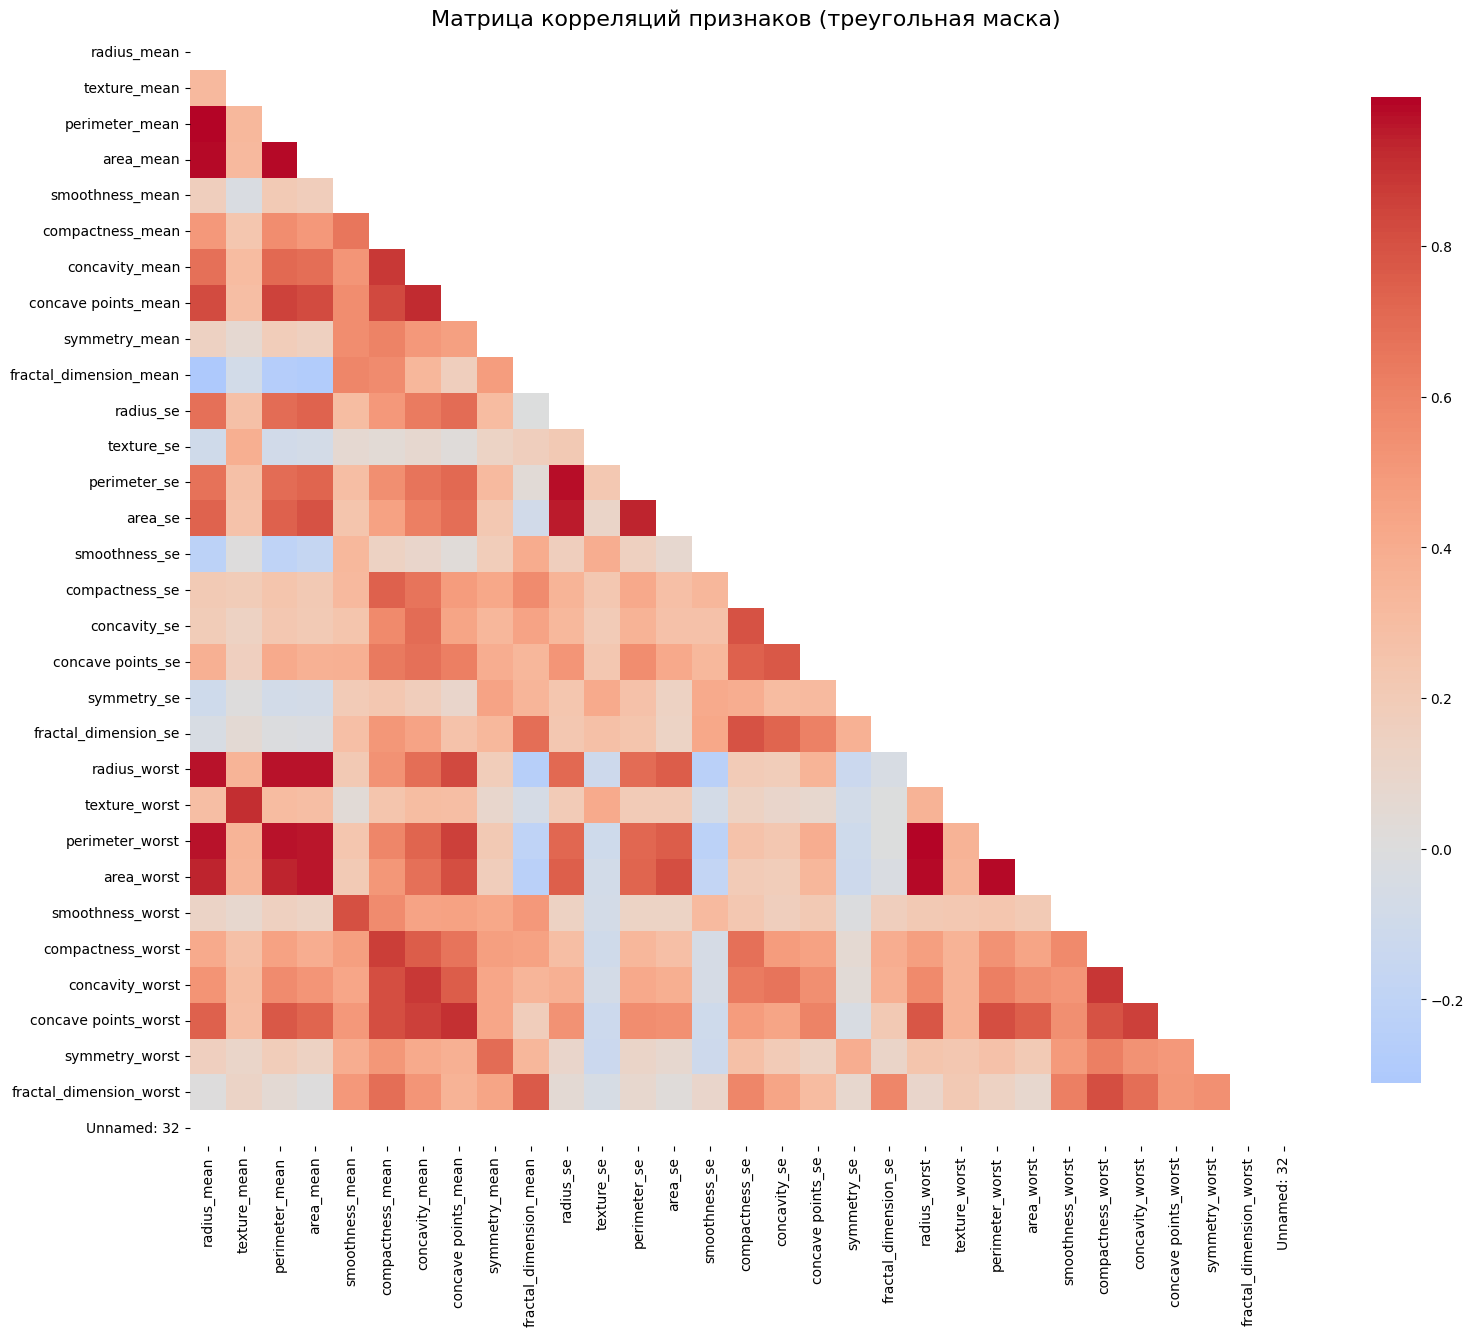

Сильно скоррелированные пары признаков (|corr| > 0.85):
radius_mean - perimeter_mean: 0.998
radius_mean - area_mean: 0.987
radius_mean - radius_worst: 0.970
radius_mean - perimeter_worst: 0.965
radius_mean - area_worst: 0.941
texture_mean - texture_worst: 0.912
perimeter_mean - area_mean: 0.987
perimeter_mean - concave points_mean: 0.851
perimeter_mean - radius_worst: 0.969
perimeter_mean - perimeter_worst: 0.970
perimeter_mean - area_worst: 0.942
area_mean - radius_worst: 0.963
area_mean - perimeter_worst: 0.959
area_mean - area_worst: 0.959
compactness_mean - concavity_mean: 0.883
compactness_mean - compactness_worst: 0.866
concavity_mean - concave points_mean: 0.921
concavity_mean - concavity_worst: 0.884
concavity_mean - concave points_worst: 0.861
concave points_mean - perimeter_worst: 0.856
concave points_mean - concave points_worst: 0.910
radius_se - perimeter_se: 0.973
radius_se - area_se: 0.952
perimeter_se - area_se: 0.938
radius_worst - perimeter_worst: 0.994
radius_worst - 

In [126]:
numeric_cols = df.select_dtypes(include=[np.number]).columns

correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(16, 14))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Маска для верхнего треугольника
sns.heatmap(correlation_matrix, mask=mask, annot=False, cmap='coolwarm', center=0,
            square=True, cbar_kws={"shrink": .8})
plt.title('Матрица корреляций признаков (треугольная маска)', fontsize=16)
plt.tight_layout()
plt.show()

print("Сильно скоррелированные пары признаков (|corr| > 0.85):")
high_corr_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.85:
            col1 = correlation_matrix.columns[i]
            col2 = correlation_matrix.columns[j]
            corr_value = correlation_matrix.iloc[i, j]
            high_corr_pairs.append((col1, col2, corr_value))
            print(f"{col1} - {col2}: {corr_value:.3f}")

# Создадим DataFrame для удобства
high_corr_df = pd.DataFrame(high_corr_pairs, columns=['Feature1', 'Feature2', 'Correlation'])
print(f"\nВсего сильно скоррелированных пар: {len(high_corr_pairs)}")

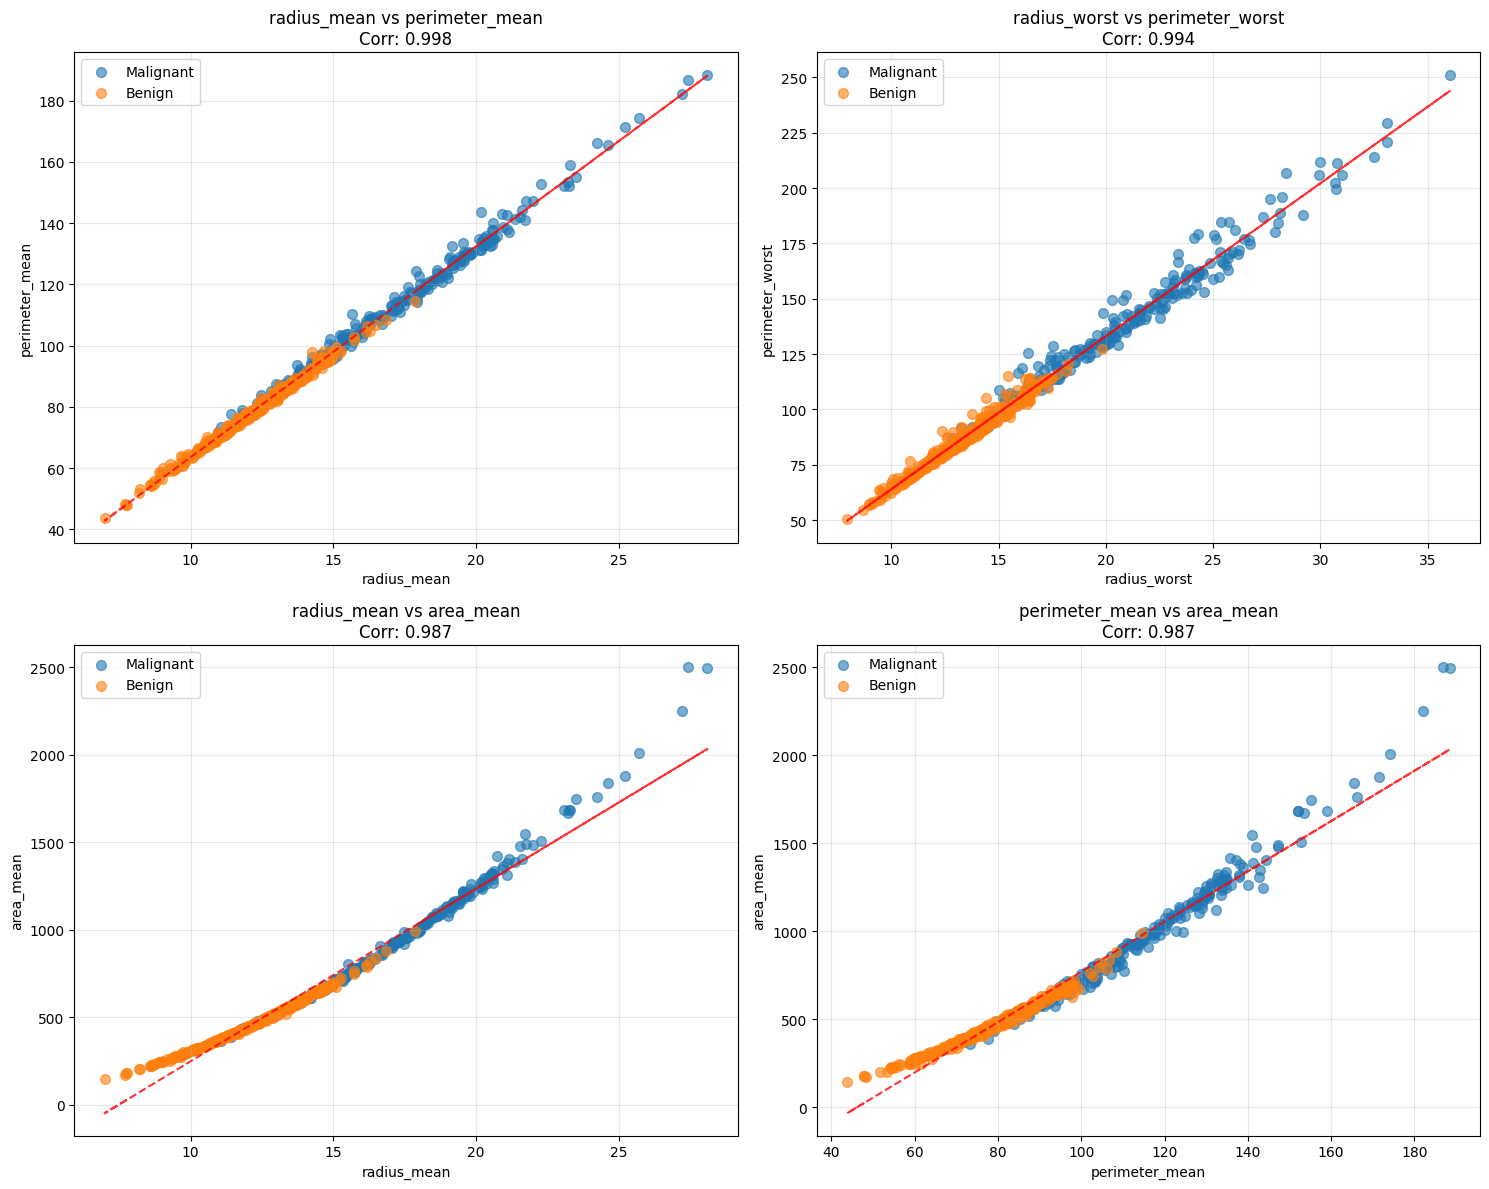


Проверка линейности (R-squared):
radius_mean vs perimeter_mean: R² = 0.996
radius_worst vs perimeter_worst: R² = 0.987
radius_mean vs area_mean: R² = 0.975
perimeter_mean vs area_mean: R² = 0.973


In [127]:
top_pairs = high_corr_df.nlargest(4, 'Correlation')

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

for idx, (_, row) in enumerate(top_pairs.iterrows()):
    feature1, feature2, corr = row['Feature1'], row['Feature2'], row['Correlation']
    
    for diagnosis_type, color in zip(['Malignant', 'Benign'], ['red', 'blue']):
        subset = df[df['diagnosis'] == diagnosis_type]
        axes[idx].scatter(subset[feature1], subset[feature2], 
                         alpha=0.6, label=diagnosis_type, s=50)
    
    axes[idx].set_xlabel(feature1)
    axes[idx].set_ylabel(feature2)
    axes[idx].set_title(f'{feature1} vs {feature2}\nCorr: {corr:.3f}')
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)
    
    # Добавим линию тренда
    z = np.polyfit(df[feature1], df[feature2], 1)
    p = np.poly1d(z)
    axes[idx].plot(df[feature1], p(df[feature1]), "r--", alpha=0.8)

plt.tight_layout()
plt.show()

# Проверим линейность с помощью статистики
print("\nПроверка линейности (R-squared):")
for _, row in top_pairs.iterrows():
    feature1, feature2 = row['Feature1'], row['Feature2']
    slope, intercept, r_value, p_value, std_err = stats.linregress(df[feature1], df[feature2])
    print(f"{feature1} vs {feature2}: R² = {r_value**2:.3f}")

### Удаление сильно скоррелированных полей

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   smoothness_mean          569 non-null    float64
 4   compactness_mean         569 non-null    float64
 5   symmetry_mean            569 non-null    float64
 6   fractal_dimension_mean   569 non-null    float64
 7   radius_se                569 non-null    float64
 8   texture_se               569 non-null    float64
 9   smoothness_se            569 non-null    float64
 10  compactness_se           569 non-null    float64
 11  concavity_se             569 non-null    float64
 12  concave points_se        569 non-null    float64
 13  symmetry_se              569 non-null    float64
 14  fractal_dimension_se     5

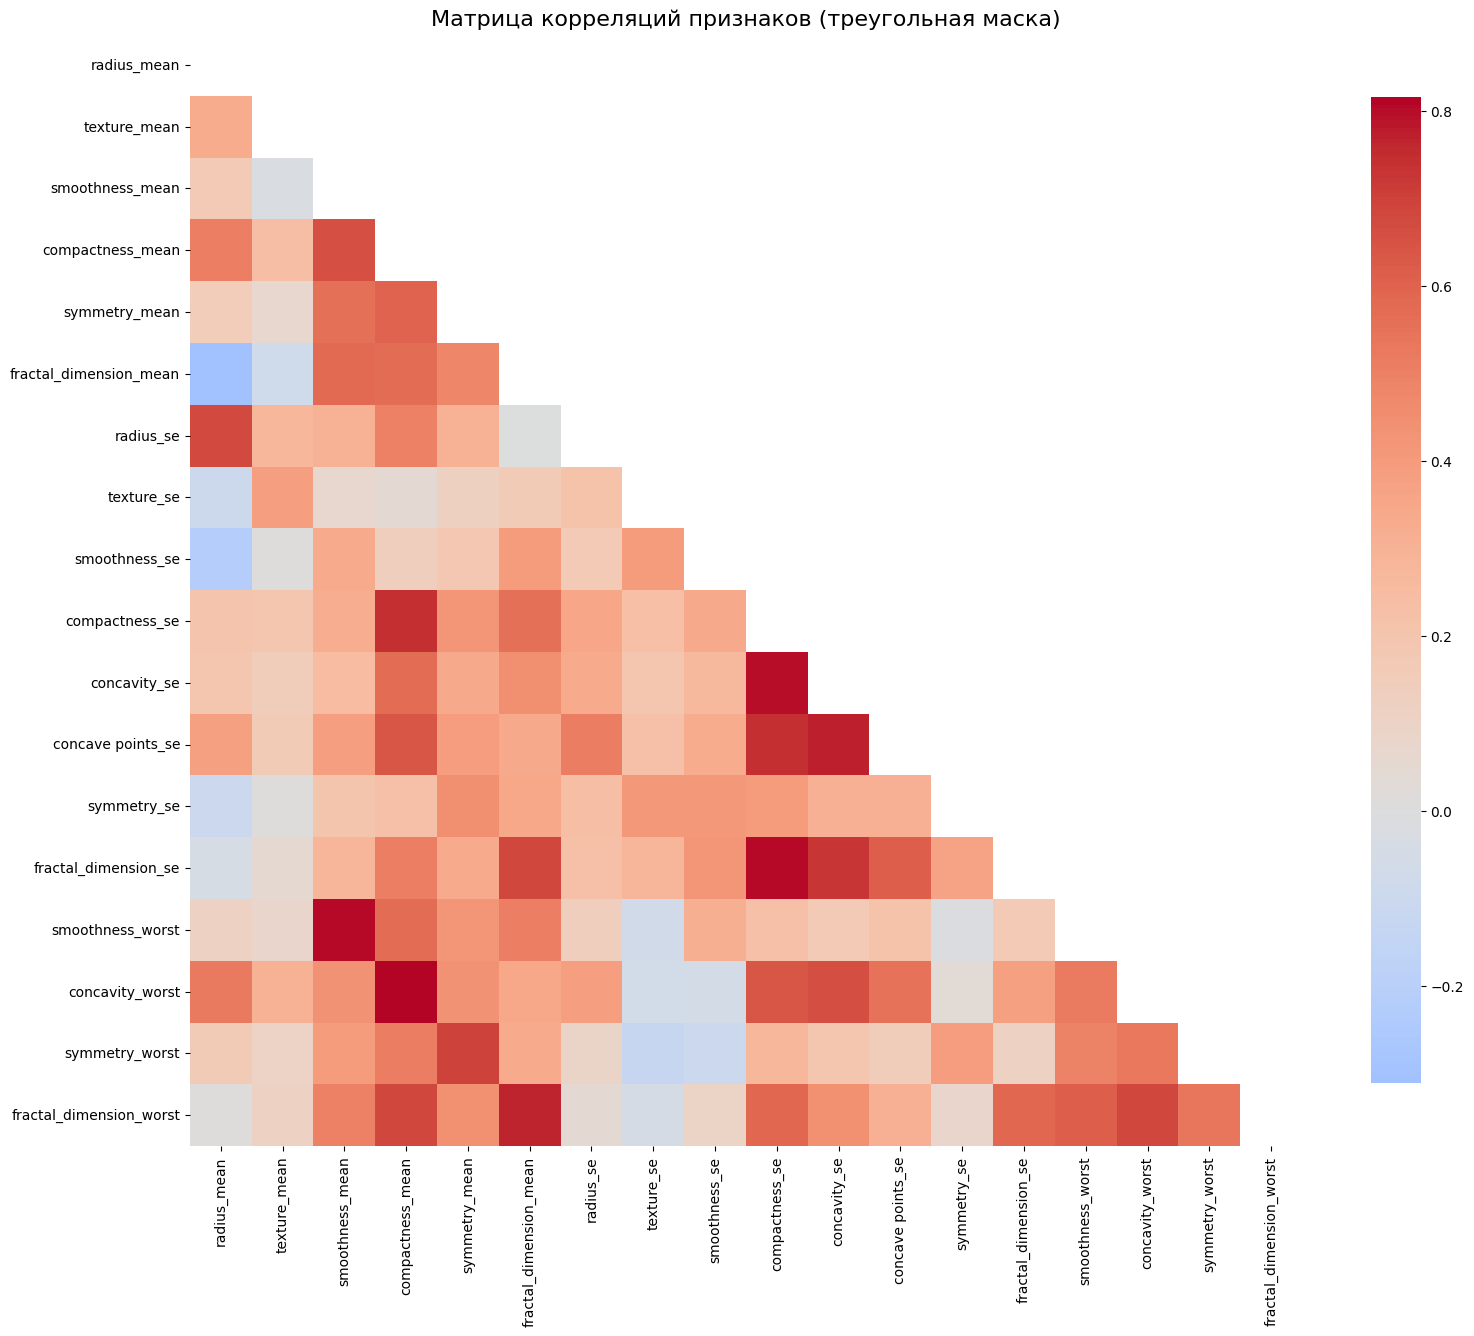

In [128]:
colums_to_remove = {'perimeter_mean', 'radius_worst', 'perimeter_worst', 
                    'area_worst', 'texture_worst', 'area_mean', 'concavity_mean',
                    'compactness_worst', 'concave points_mean', 'perimeter_se',
                    'area_se', 'concave points_worst', 'Unnamed: 32'}

df_clean = df.drop(colums_to_remove, axis=1, errors='ignore')

df_clean.info()

numeric_cols = df_clean.select_dtypes(include=[np.number]).columns

correlation_matrix = df_clean[numeric_cols].corr()

plt.figure(figsize=(16, 14))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Маска для верхнего треугольника
sns.heatmap(correlation_matrix, mask=mask, annot=False, cmap='coolwarm', center=0,
            square=True, cbar_kws={"shrink": .8})
plt.title('Матрица корреляций признаков (треугольная маска)', fontsize=16)
plt.tight_layout()
plt.show()


### Гистограммы распределений

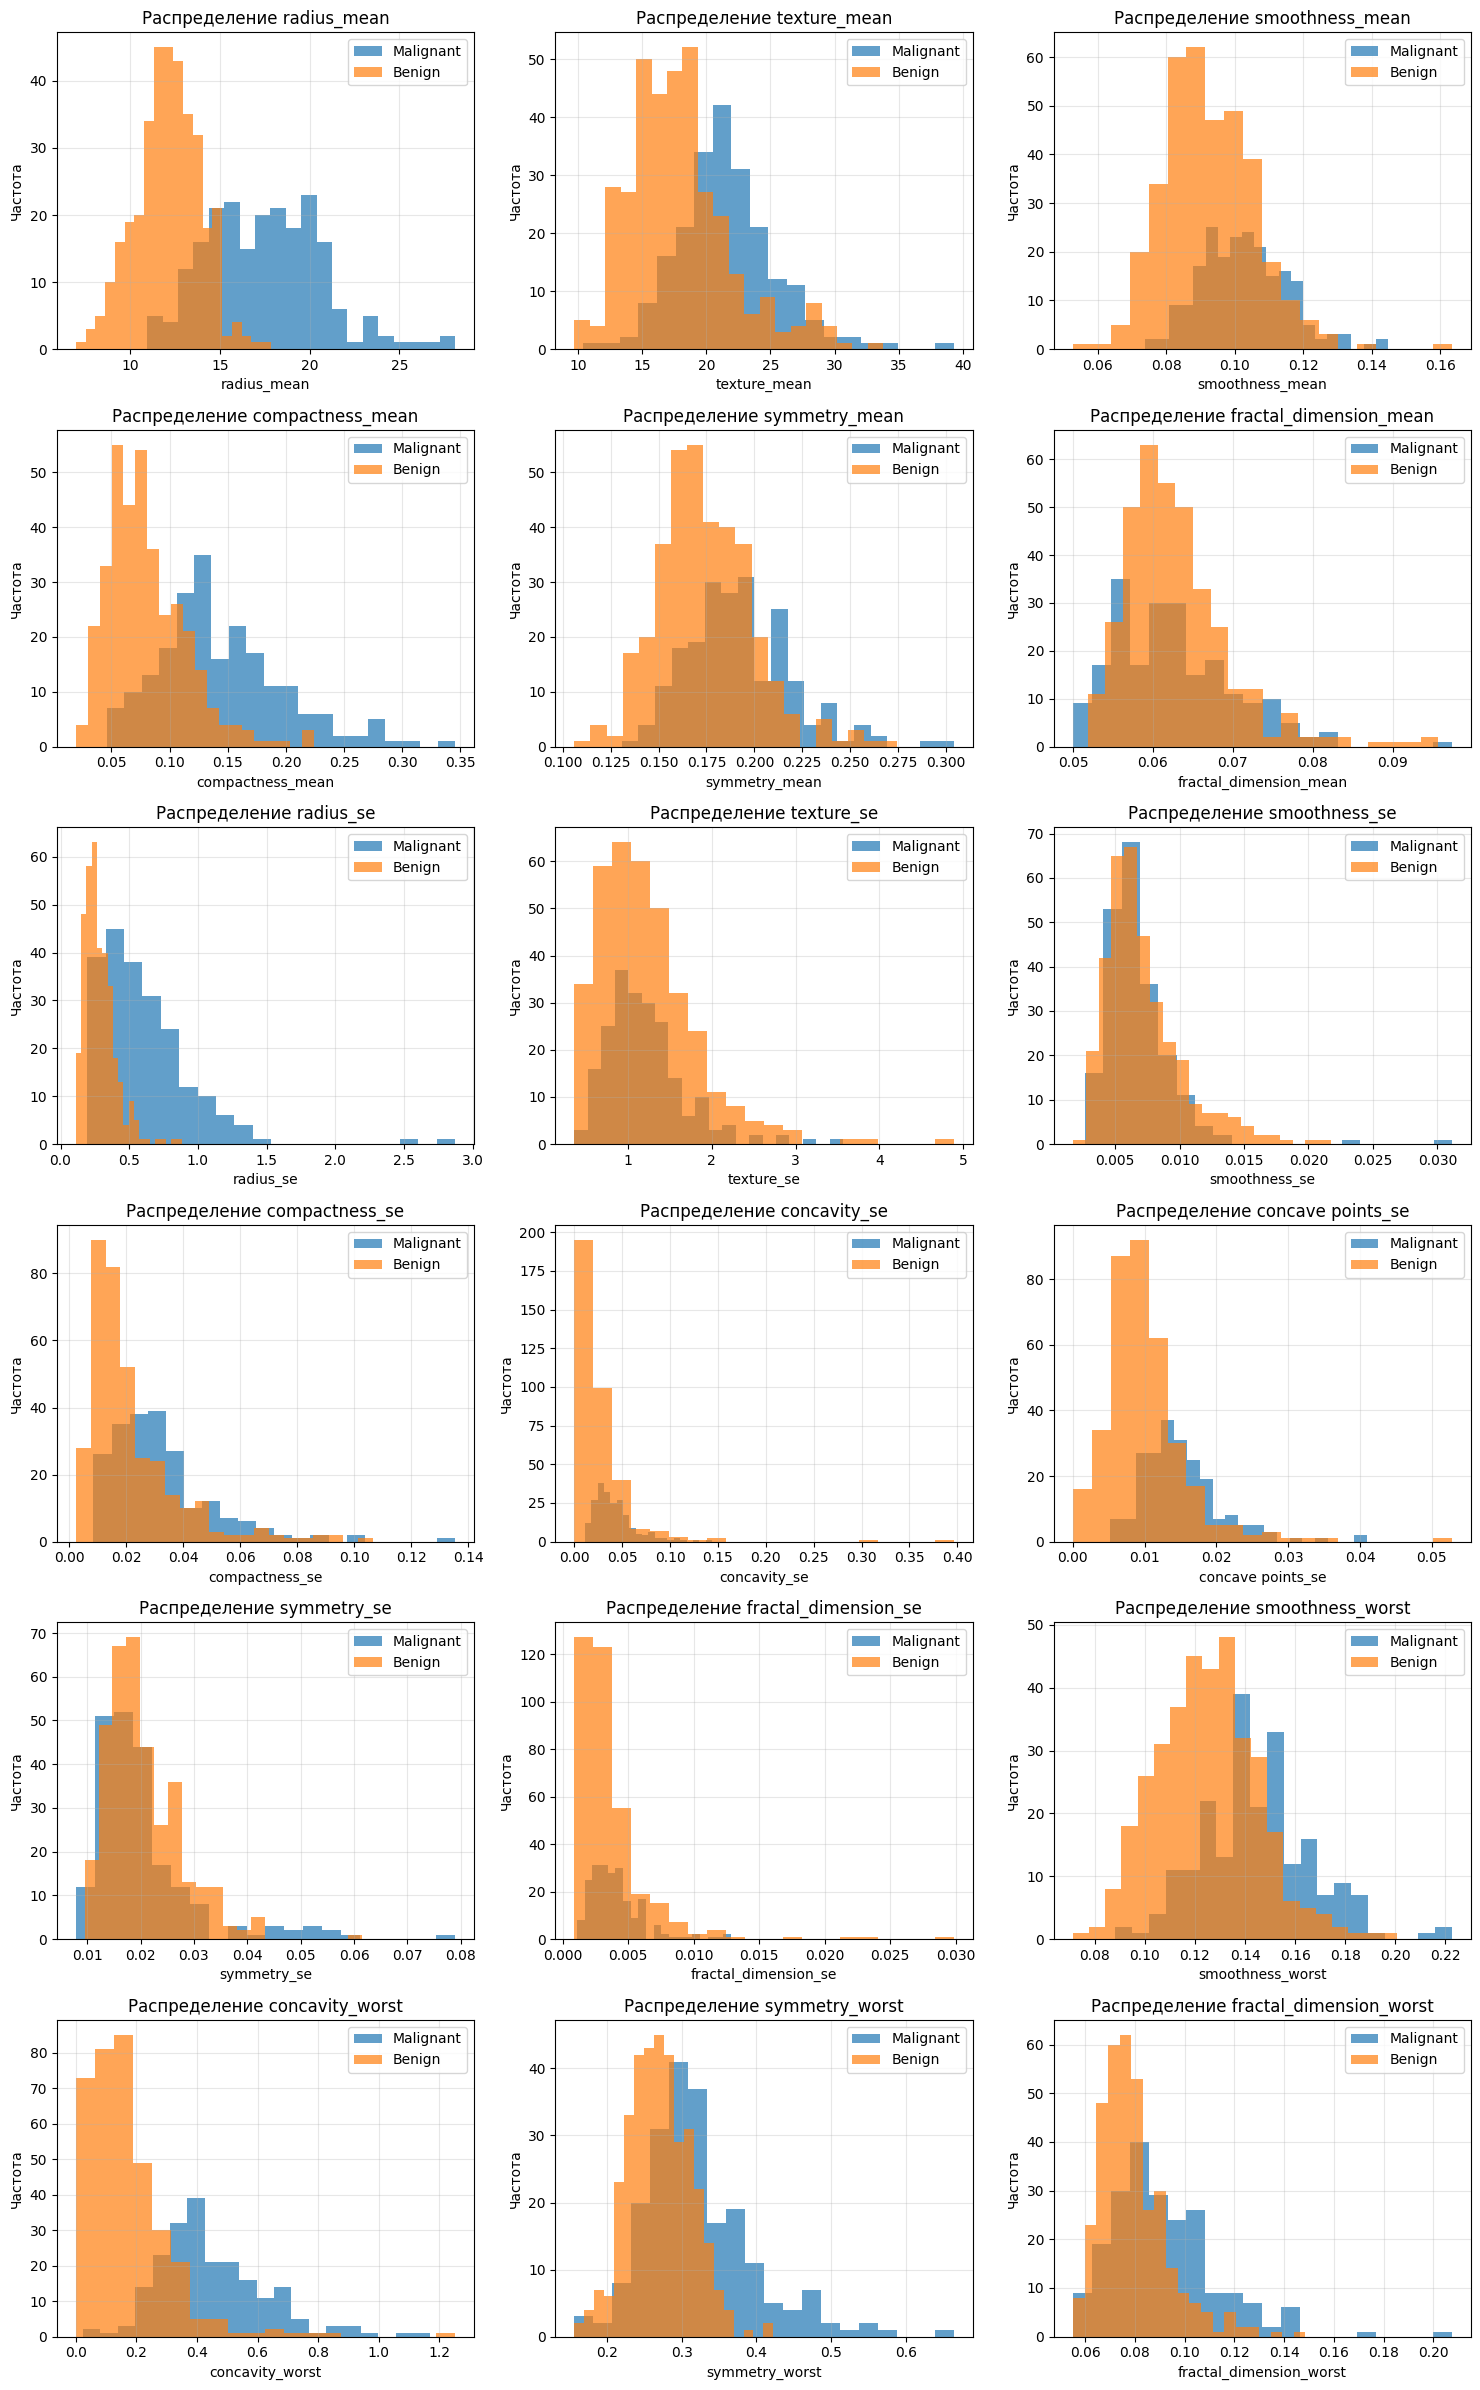

In [129]:
key_features = ['radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean', 'symmetry_mean', 
                'fractal_dimension_mean', 'radius_se', 'texture_se', 'smoothness_se', 'compactness_se', 
                'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'smoothness_worst', 
                'concavity_worst', 'symmetry_worst', 'fractal_dimension_worst']

# Создадим сетку графиков
fig, axes = plt.subplots(6, 3, figsize=(15, 24))
axes = axes.ravel()

for i, feature in enumerate(key_features):

    subset_m = df_clean[df_clean['diagnosis'] == 'Malignant']
    axes[i].hist(subset_m[feature], alpha=0.7, label='Malignant', bins=20)
    subset_b = df_clean[df_clean['diagnosis'] == 'Benign']
    axes[i].hist(subset_b[feature], alpha=0.7, label='Benign', bins=20)
    
    axes[i].set_title(f'Распределение {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Частота')
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


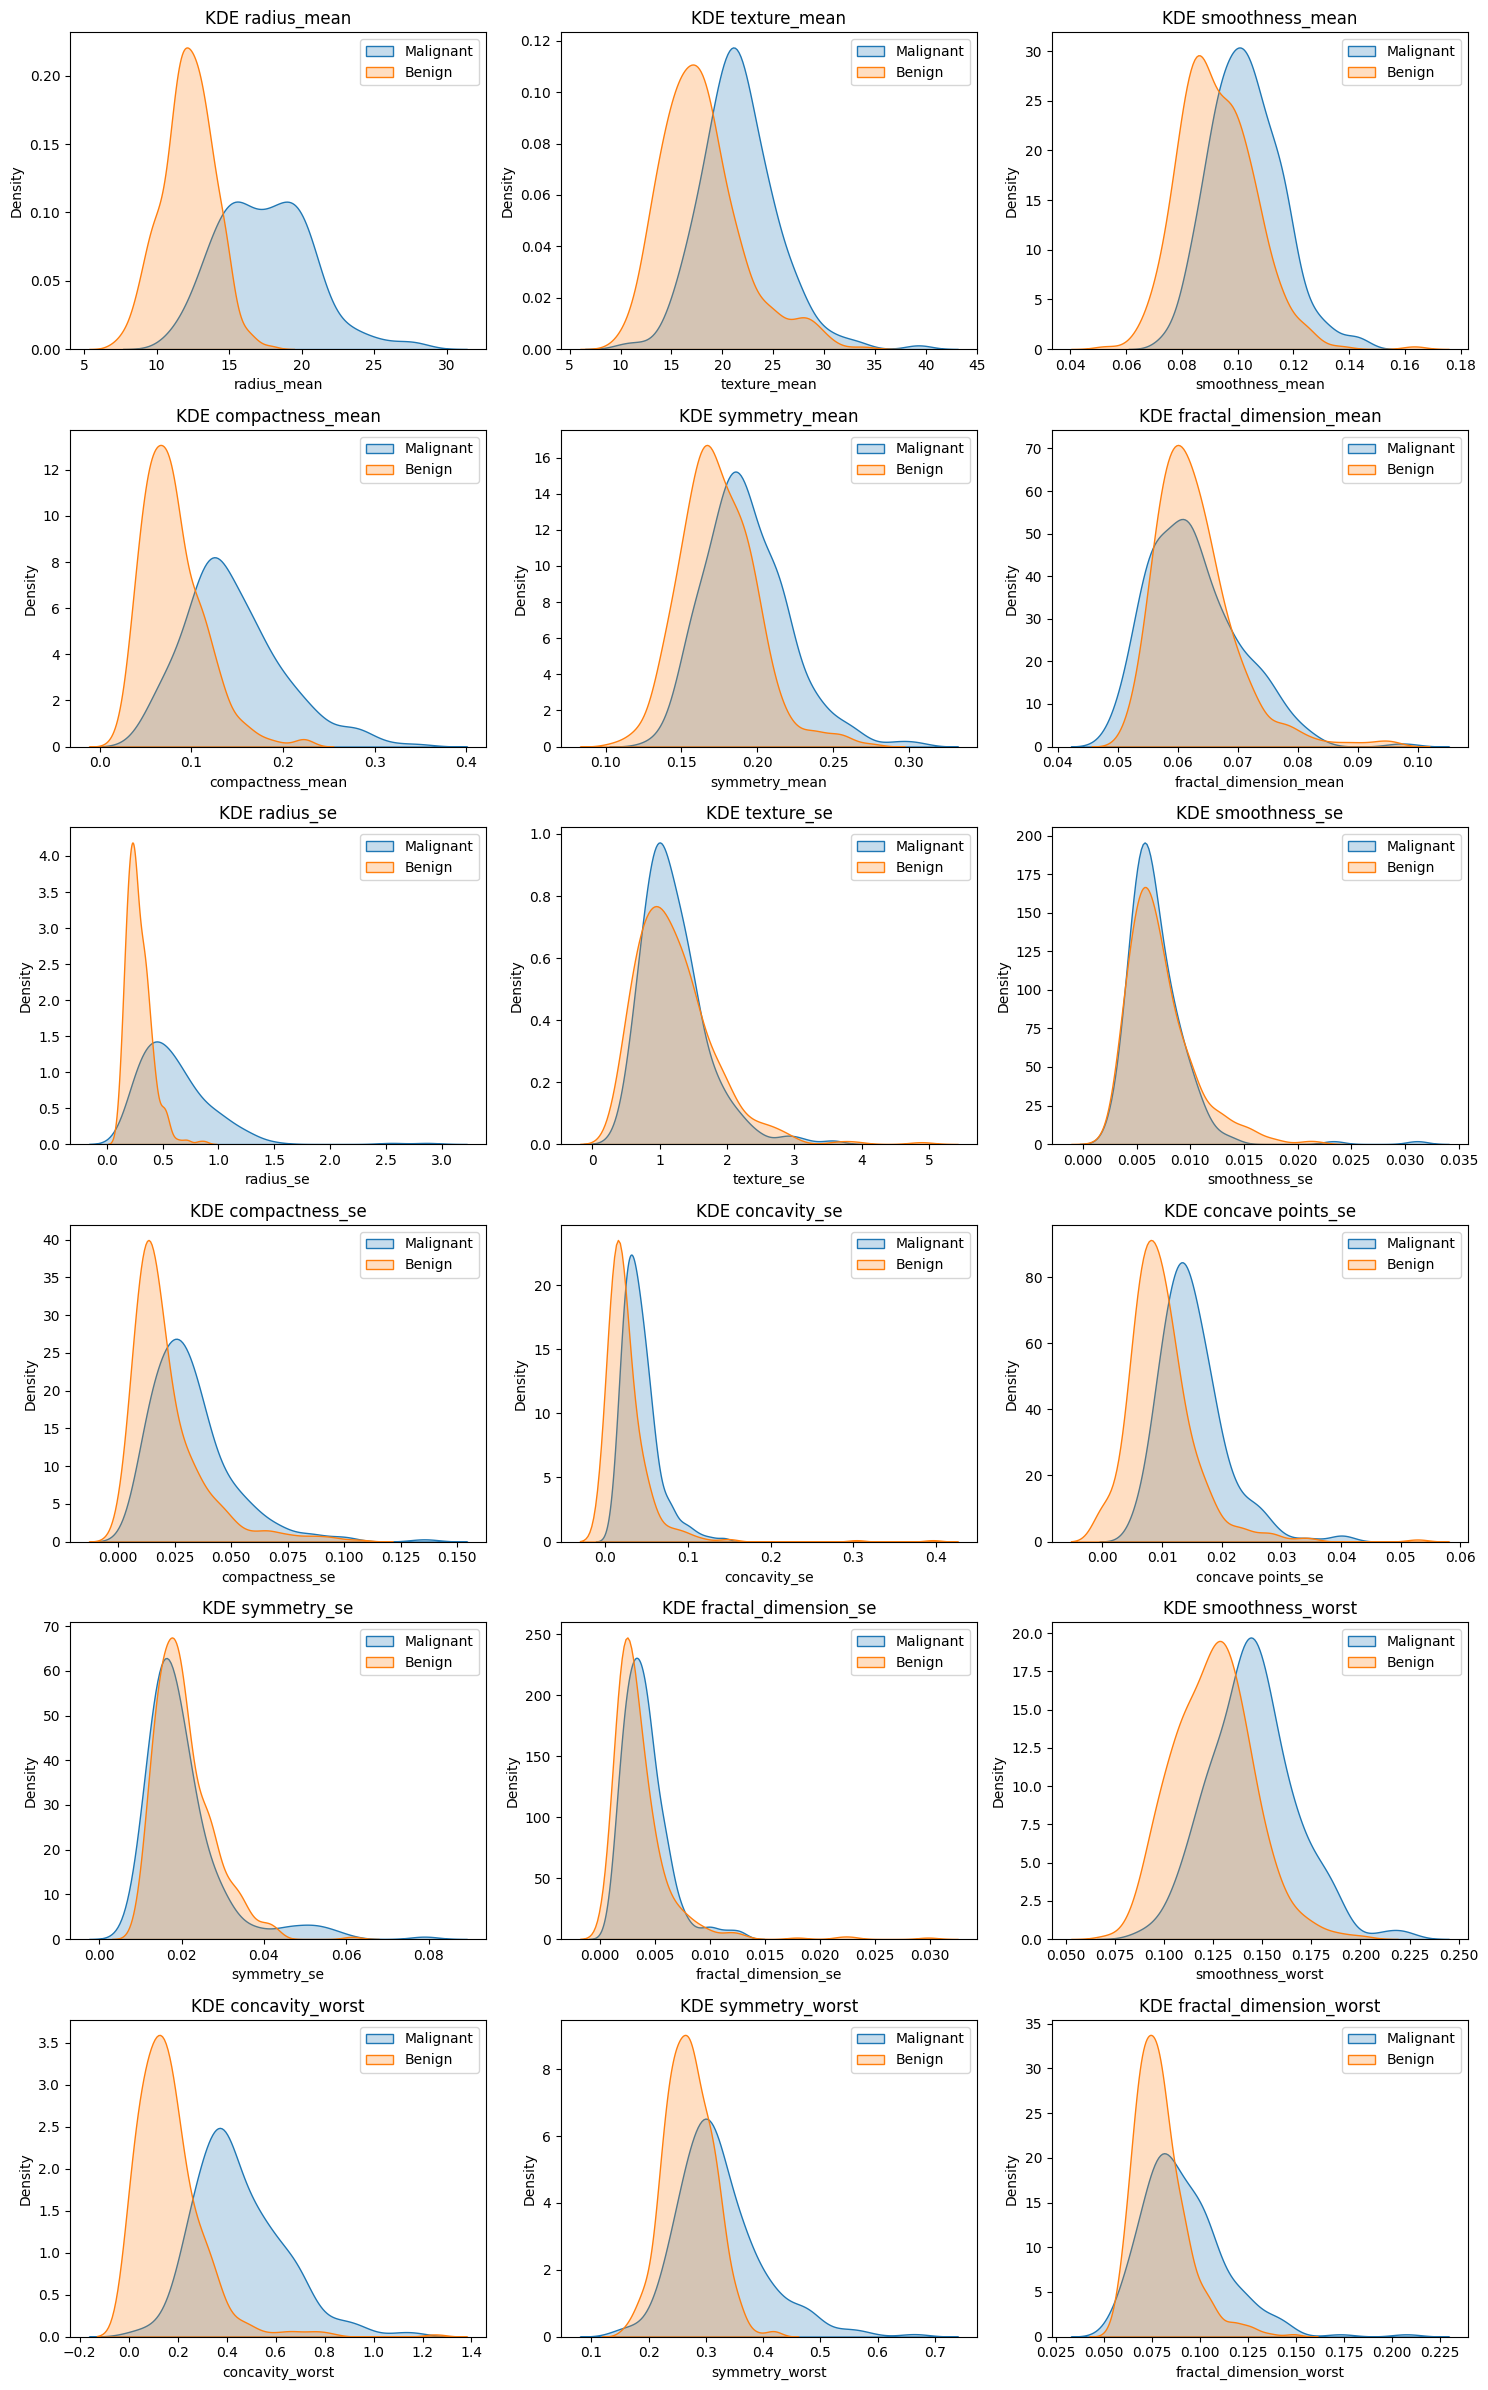

In [130]:
plt.figure(figsize=(15, 24))
for i, feature in enumerate(key_features):
    plt.subplot(6, 3, i+1)
    subset_m = df_clean[df_clean['diagnosis'] == 'Malignant']
    sns.kdeplot(data=subset_m, x=feature, label='Malignant', fill=True)
    subset_b = df_clean[df_clean['diagnosis'] == 'Benign']
    sns.kdeplot(data=subset_b, x=feature, label='Benign', fill=True)

    plt.title(f'KDE {feature}')
    plt.legend()

plt.tight_layout()
plt.show()

Топ-9 признаков с наибольшей разницей между классами:
radius_mean: разница = 5.32
texture_mean: разница = 3.69
radius_se: разница = 0.33
concavity_worst: разница = 0.28
compactness_mean: разница = 0.07
symmetry_worst: разница = 0.05
smoothness_worst: разница = 0.02
symmetry_mean: разница = 0.02
concavity_se: разница = 0.02


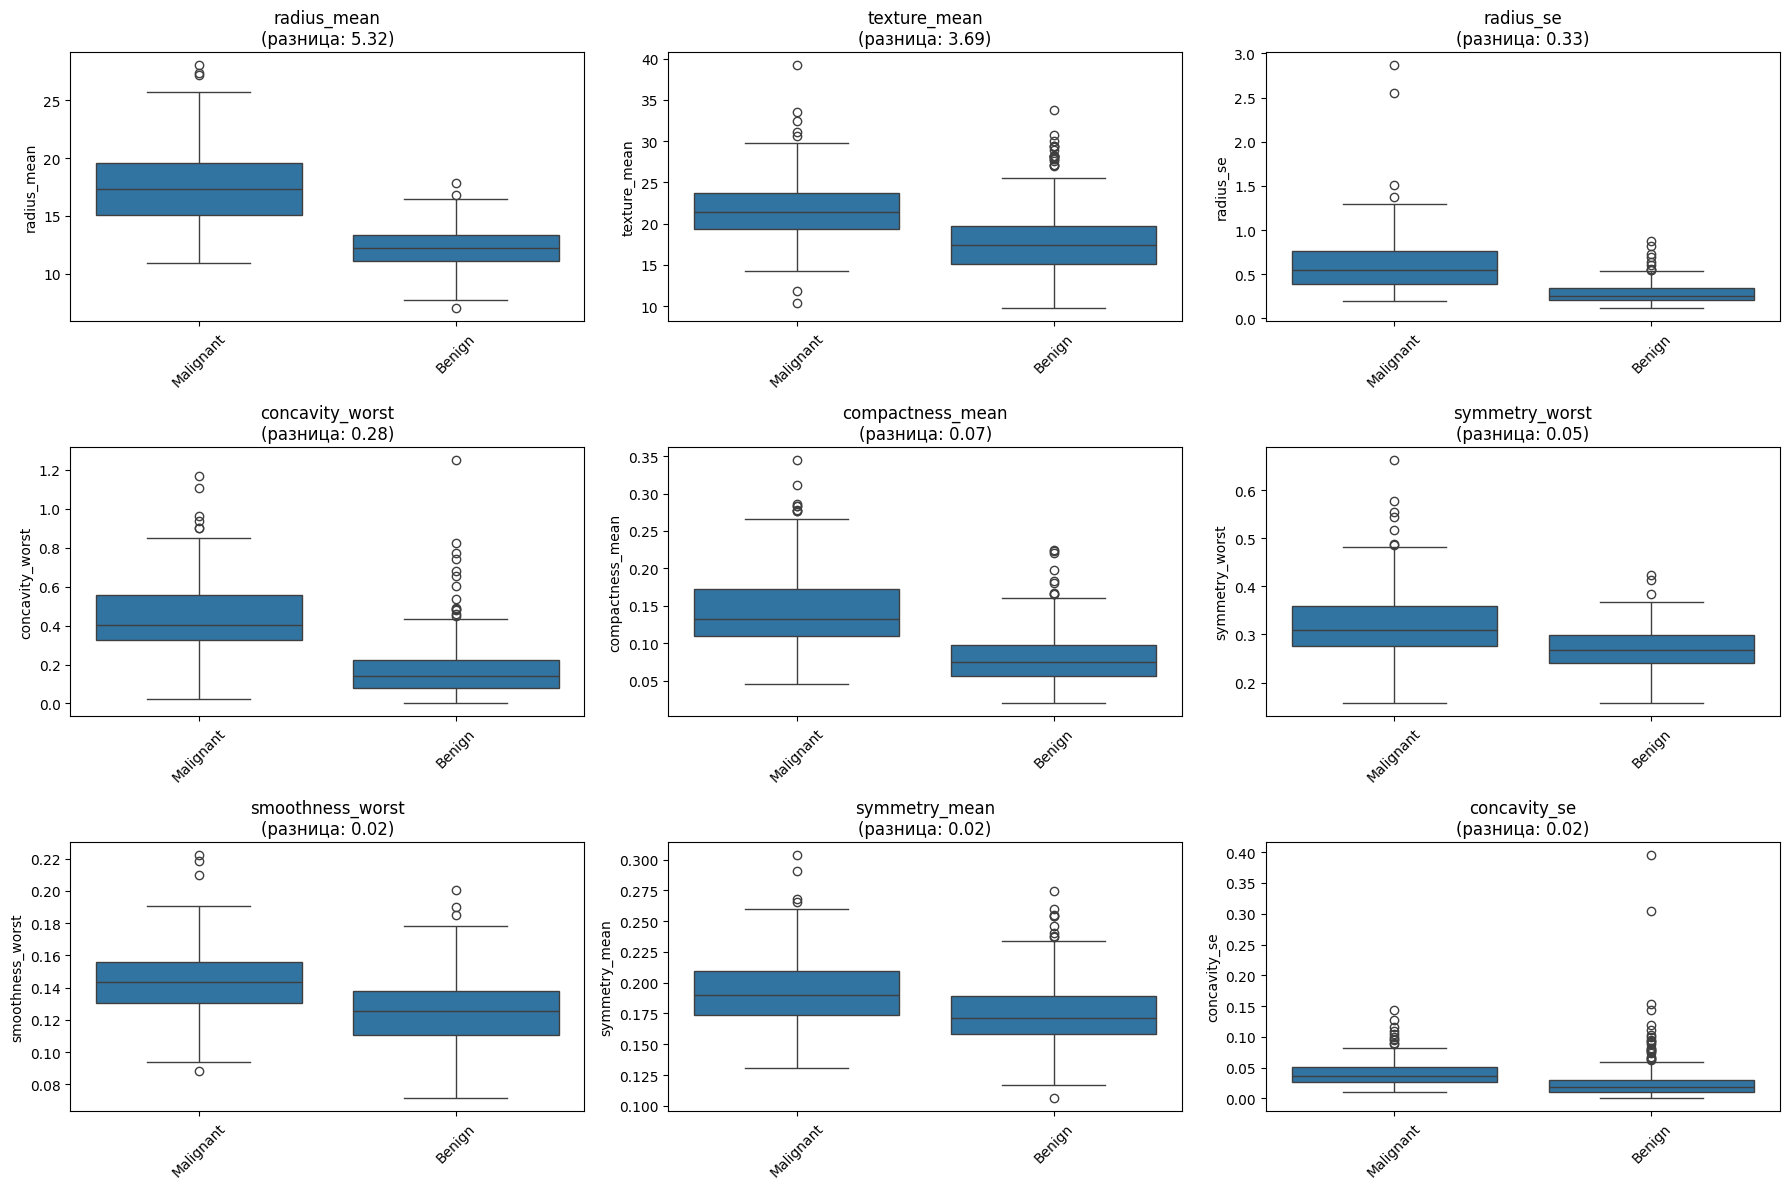


=== Т-ТЕСТ ДЛЯ ПРОВЕРКИ СТАТИСТИЧЕСКОЙ ЗНАЧИМОСТИ ===
Признаки с наибольшей статистической значимостью различий:

Топ-5 наиболее значимых признаков:
Признак | t-статистика | p-value | Benign mean | Malignant mean
----------------------------------------------------------------------
radius_mean     |   -25.44 | 8.47e-96 |    12.15 |      17.46
concavity_worst |   -20.90 | 2.46e-72 |     0.17 |       0.45
compactness_mean |   -17.70 | 3.94e-56 |     0.08 |       0.15
radius_se       |   -16.40 | 9.74e-50 |     0.28 |       0.61
smoothness_worst |   -11.07 | 6.58e-26 |     0.12 |       0.14


In [131]:
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns

mean_differences = []
for col in numeric_cols:
    benign_mean = df_clean[df_clean['diagnosis'] == 'Benign'][col].mean()
    malignant_mean = df_clean[df_clean['diagnosis'] == 'Malignant'][col].mean()
    mean_diff = abs(malignant_mean - benign_mean)
    mean_differences.append((col, mean_diff))

# Отсортируем по разнице в средних
mean_differences.sort(key=lambda x: x[1], reverse=True)
top_features = [x[0] for x in mean_differences[:9]]

print("Топ-9 признаков с наибольшей разницей между классами:")
for col, diff in mean_differences[:9]:
    print(f"{col}: разница = {diff:.2f}")

# Построим boxplots
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.ravel()

for i, feature in enumerate(top_features[:9]):
    sns.boxplot(data=df_clean, x='diagnosis', y=feature, ax=axes[i])
    axes[i].set_title(f'{feature}\n(разница: {mean_differences[i][1]:.2f})')
    axes[i].set_xlabel('')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Дополнительный анализ: t-test для проверки значимости различий
print("\n=== Т-ТЕСТ ДЛЯ ПРОВЕРКИ СТАТИСТИЧЕСКОЙ ЗНАЧИМОСТИ ===")
print("Признаки с наибольшей статистической значимостью различий:")

significant_features = []
for col in numeric_cols:
    benign_data = df_clean[df_clean['diagnosis'] == 'Benign'][col]
    malignant_data = df_clean[df_clean['diagnosis'] == 'Malignant'][col]
    
    t_stat, p_value = stats.ttest_ind(benign_data, malignant_data)
    
    if p_value < 0.001:  # Высокая значимость
        significant_features.append((col, t_stat, p_value, 
                                   benign_data.mean(), malignant_data.mean()))

# Отсортируем по p-value
significant_features.sort(key=lambda x: x[2])

print("\nТоп-5 наиболее значимых признаков:")
print("Признак | t-статистика | p-value | Benign mean | Malignant mean")
print("-" * 70)
for col, t_stat, p_val, benign_mean, mal_mean in significant_features[:5]:
    print(f"{col:15} | {t_stat:8.2f} | {p_val:.2e} | {benign_mean:8.2f} | {mal_mean:10.2f}")

# kNN

### Подготовка данных

In [132]:
df_kNN = df_clean.copy()
df_kNN['diagnosis'] = df_kNN['diagnosis'].map({'Malignant': 1, 'Benign': 0})  # 1 - злокачественные, 0 - доброкачественные

X = df_kNN.drop('diagnosis', axis=1)
y = df_kNN['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)


### Метод ближайших соседей
### 3 соседа

МЕТРИКИ КАЧЕСТВА k=3:
Accuracy:  0.9532
Precision: 1.0000
Recall:    0.8750
F1-score:  0.9333

MATRIX ОШИБОК:


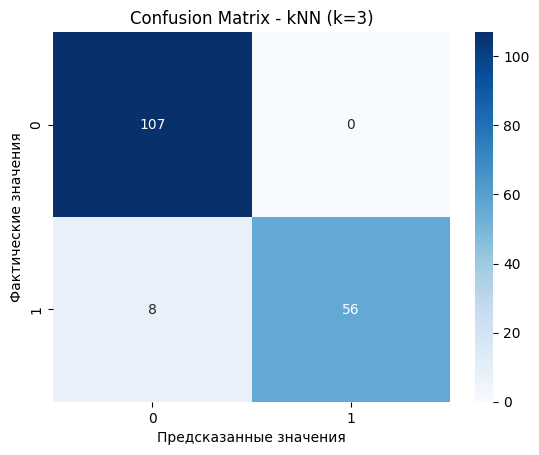

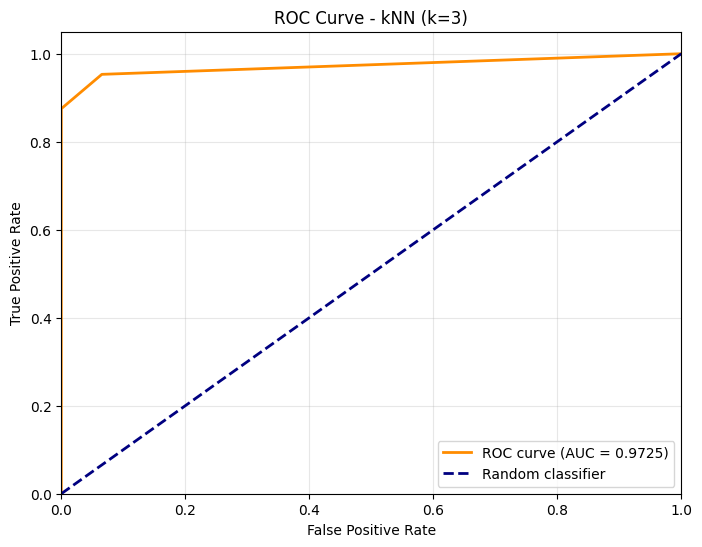


ROC-AUC: 0.9725


In [141]:
knn_basic = KNeighborsClassifier(n_neighbors=3)
knn_basic.fit(X_train_scaled, y_train)

y_pred_basic = knn_basic.predict(X_test_scaled)
y_pred_proba_basic = knn_basic.predict_proba(X_test_scaled)[:, 1]

accuracy_basic = accuracy_score(y_test, y_pred_basic)
precision_basic = precision_score(y_test, y_pred_basic)
recall_basic = recall_score(y_test, y_pred_basic)
f1_basic = f1_score(y_test, y_pred_basic)


print("МЕТРИКИ КАЧЕСТВА k=3:")
print(f"Accuracy:  {accuracy_basic:.4f}")
print(f"Precision: {precision_basic:.4f}")
print(f"Recall:    {recall_basic:.4f}")
print(f"F1-score:  {f1_basic:.4f}")

# Матрица ошибок
print("\nMATRIX ОШИБОК:")
cm_basic = confusion_matrix(y_test, y_pred_basic)
sns.heatmap(cm_basic, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - kNN (k=3)')
plt.ylabel('Фактические значения')
plt.xlabel('Предсказанные значения')
plt.show()

# ROC-кривая
fpr_basic, tpr_basic, thresholds_basic = roc_curve(y_test, y_pred_proba_basic)
roc_auc_basic = auc(fpr_basic, tpr_basic)

plt.figure(figsize=(8, 6))
plt.plot(fpr_basic, tpr_basic, color='darkorange', lw=2, 
         label=f'ROC curve (AUC = {roc_auc_basic:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - kNN (k=3)')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

print(f"\nROC-AUC: {roc_auc_basic:.4f}")

### 5 ближайших соседа

МЕТРИКИ КАЧЕСТВА k=5:
Accuracy:  0.9415
Precision: 0.9821
Recall:    0.8594
F1-score:  0.9167

MATRIX ОШИБОК:


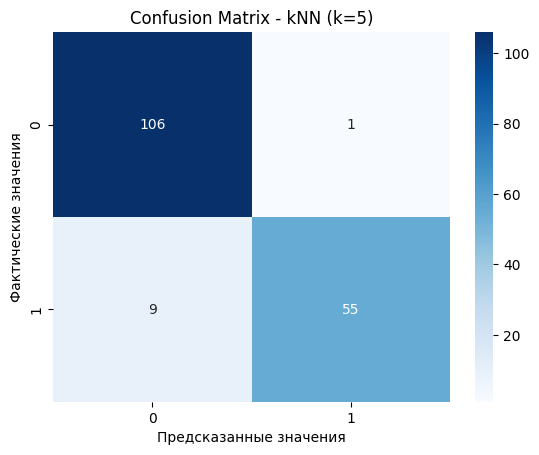

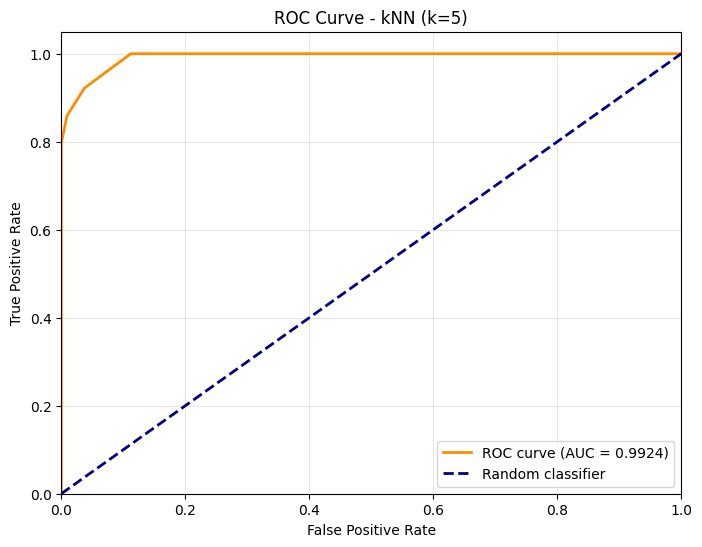


ROC-AUC: 0.9924


In [142]:
knn_basic = KNeighborsClassifier(n_neighbors=5)
knn_basic.fit(X_train_scaled, y_train)

y_pred_basic = knn_basic.predict(X_test_scaled)
y_pred_proba_basic = knn_basic.predict_proba(X_test_scaled)[:, 1]

accuracy_basic = accuracy_score(y_test, y_pred_basic)
precision_basic = precision_score(y_test, y_pred_basic)
recall_basic = recall_score(y_test, y_pred_basic)
f1_basic = f1_score(y_test, y_pred_basic)


print("МЕТРИКИ КАЧЕСТВА k=5:")
print(f"Accuracy:  {accuracy_basic:.4f}")
print(f"Precision: {precision_basic:.4f}")
print(f"Recall:    {recall_basic:.4f}")
print(f"F1-score:  {f1_basic:.4f}")

# Матрица ошибок
print("\nMATRIX ОШИБОК:")
cm_basic = confusion_matrix(y_test, y_pred_basic)
sns.heatmap(cm_basic, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - kNN (k=5)')
plt.ylabel('Фактические значения')
plt.xlabel('Предсказанные значения')
plt.show()

# ROC-кривая
fpr_basic, tpr_basic, thresholds_basic = roc_curve(y_test, y_pred_proba_basic)
roc_auc_basic = auc(fpr_basic, tpr_basic)

plt.figure(figsize=(8, 6))
plt.plot(fpr_basic, tpr_basic, color='darkorange', lw=2, 
         label=f'ROC curve (AUC = {roc_auc_basic:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - kNN (k=5)')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

print(f"\nROC-AUC: {roc_auc_basic:.4f}")

### 11 ближайших соседей

МЕТРИКИ КАЧЕСТВА k=11:
Accuracy:  0.9415
Precision: 0.9655
Recall:    0.8750
F1-score:  0.9180

MATRIX ОШИБОК:


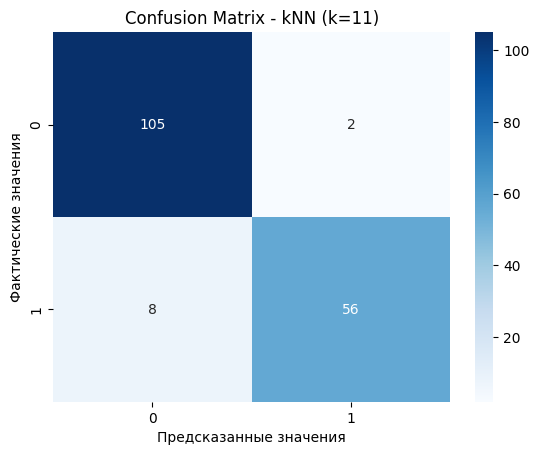

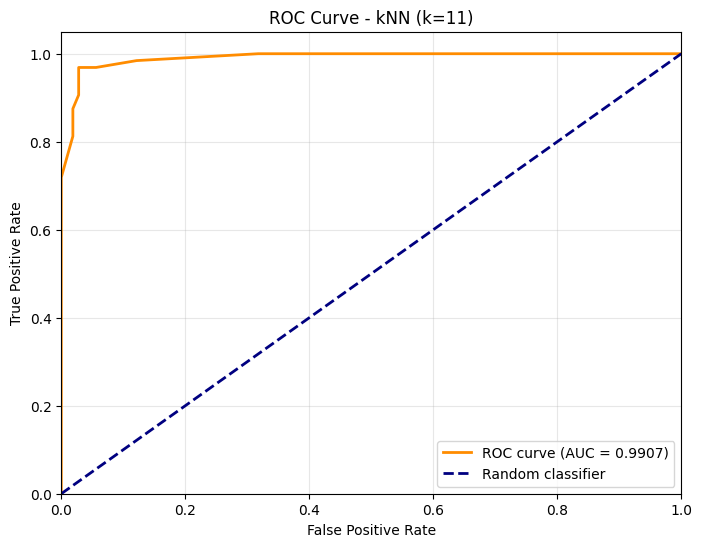


ROC-AUC: 0.9907


In [143]:
knn_basic = KNeighborsClassifier(n_neighbors=11)
knn_basic.fit(X_train_scaled, y_train)

y_pred_basic = knn_basic.predict(X_test_scaled)
y_pred_proba_basic = knn_basic.predict_proba(X_test_scaled)[:, 1]

accuracy_basic = accuracy_score(y_test, y_pred_basic)
precision_basic = precision_score(y_test, y_pred_basic)
recall_basic = recall_score(y_test, y_pred_basic)
f1_basic = f1_score(y_test, y_pred_basic)


print("МЕТРИКИ КАЧЕСТВА k=11:")
print(f"Accuracy:  {accuracy_basic:.4f}")
print(f"Precision: {precision_basic:.4f}")
print(f"Recall:    {recall_basic:.4f}")
print(f"F1-score:  {f1_basic:.4f}")

# Матрица ошибок
print("\nMATRIX ОШИБОК:")
cm_basic = confusion_matrix(y_test, y_pred_basic)
sns.heatmap(cm_basic, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - kNN (k=11)')
plt.ylabel('Фактические значения')
plt.xlabel('Предсказанные значения')
plt.show()

# ROC-кривая
fpr_basic, tpr_basic, thresholds_basic = roc_curve(y_test, y_pred_proba_basic)
roc_auc_basic = auc(fpr_basic, tpr_basic)

plt.figure(figsize=(8, 6))
plt.plot(fpr_basic, tpr_basic, color='darkorange', lw=2, 
         label=f'ROC curve (AUC = {roc_auc_basic:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - kNN (k=11)')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

print(f"\nROC-AUC: {roc_auc_basic:.4f}")

### 21 Ближайших соседей

МЕТРИКИ КАЧЕСТВА k=21:
Accuracy:  0.9415
Precision: 0.9821
Recall:    0.8594
F1-score:  0.9167

MATRIX ОШИБОК:


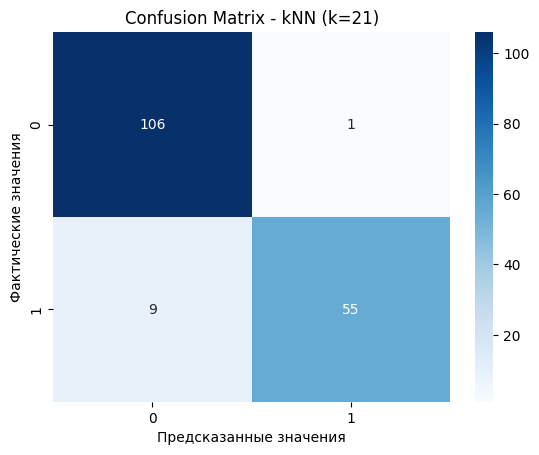

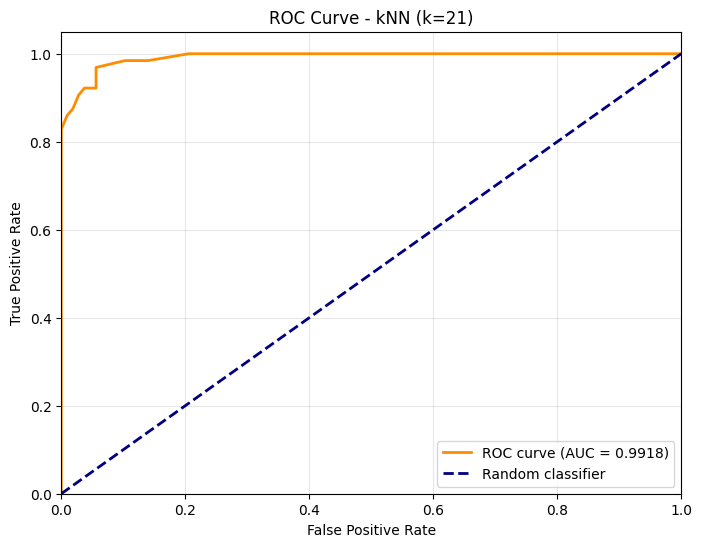


ROC-AUC: 0.9918


In [140]:
knn_basic = KNeighborsClassifier(n_neighbors=21)
knn_basic.fit(X_train_scaled, y_train)

y_pred_basic = knn_basic.predict(X_test_scaled)
y_pred_proba_basic = knn_basic.predict_proba(X_test_scaled)[:, 1]

accuracy_basic = accuracy_score(y_test, y_pred_basic)
precision_basic = precision_score(y_test, y_pred_basic)
recall_basic = recall_score(y_test, y_pred_basic)
f1_basic = f1_score(y_test, y_pred_basic)


print("МЕТРИКИ КАЧЕСТВА k=21:")
print(f"Accuracy:  {accuracy_basic:.4f}")
print(f"Precision: {precision_basic:.4f}")
print(f"Recall:    {recall_basic:.4f}")
print(f"F1-score:  {f1_basic:.4f}")

# Матрица ошибок
print("\nMATRIX ОШИБОК:")
cm_basic = confusion_matrix(y_test, y_pred_basic)
sns.heatmap(cm_basic, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - kNN (k=21)')
plt.ylabel('Фактические значения')
plt.xlabel('Предсказанные значения')
plt.show()

# ROC-кривая
fpr_basic, tpr_basic, thresholds_basic = roc_curve(y_test, y_pred_proba_basic)
roc_auc_basic = auc(fpr_basic, tpr_basic)

plt.figure(figsize=(8, 6))
plt.plot(fpr_basic, tpr_basic, color='darkorange', lw=2, 
         label=f'ROC curve (AUC = {roc_auc_basic:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - kNN (k=21)')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

print(f"\nROC-AUC: {roc_auc_basic:.4f}")

# Итоги

1. В датасете достаточно много сколлерированных колонок (из 32 после чистки осталоаь 18 колонок)
2. Классы достаточно хорошо разделяются, kNN дает хорошую точность
3. С увеличением количества соседей (больше 15), точность падает